In [7]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [10]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [11]:
df = pd.read_excel('Silver_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

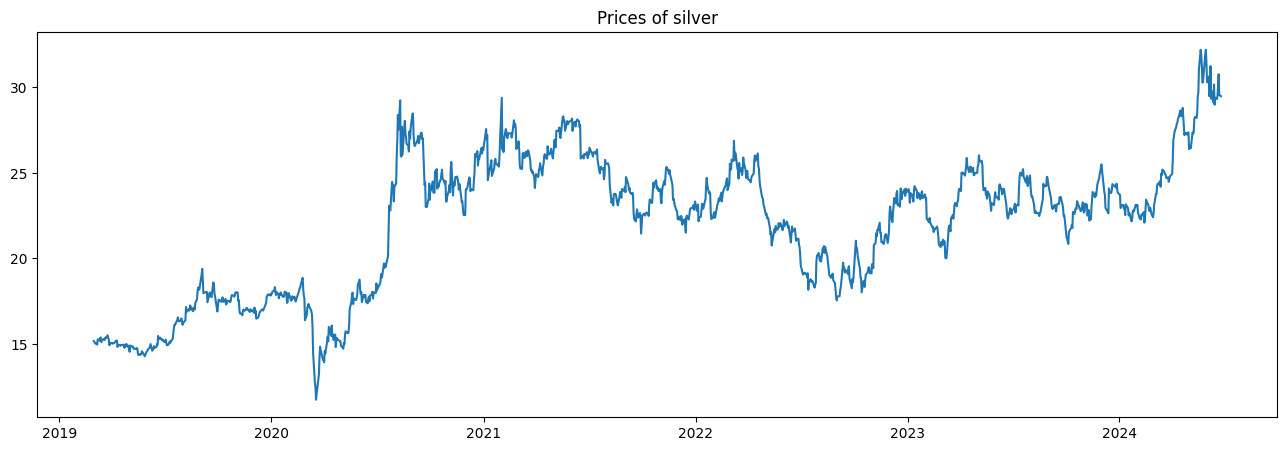

In [32]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of silver')
    plt.show()

In [13]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,15.555000,15.575000,15.080000,15.169000,585
2019-03-04,2019-03-04,15.170000,15.205000,15.005000,15.017000,317
2019-03-05,2019-03-05,15.025000,15.075000,15.005000,15.020000,222
2019-03-06,2019-03-06,15.025000,15.025000,14.975000,15.003000,25
2019-03-07,2019-03-07,15.025000,15.025000,14.920000,14.960000,8
...,...,...,...,...,...,...
2024-06-17,2024-06-17,29.325001,29.325001,29.325001,29.325001,0
2024-06-18,2024-06-18,29.004999,29.504999,28.955000,29.504999,66
2024-06-20,2024-06-20,29.500000,30.775999,29.500000,30.775999,20
2024-06-21,2024-06-21,30.500000,30.510000,29.573000,29.573000,20


In [14]:
# Split dataset 

In [15]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [16]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [17]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [18]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.20955, saving model to save_model_7_2_1.keras
17/17 - 3s - 187ms/step - loss: 0.2096
Epoch 2/80

Epoch 2: loss improved from 0.20955 to 0.07285, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0729
Epoch 3/80

Epoch 3: loss improved from 0.07285 to 0.05524, saving model to save_model_7_2_1.keras
17/17 - 1s - 48ms/step - loss: 0.0552
Epoch 4/80

Epoch 4: loss improved from 0.05524 to 0.04719, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0472
Epoch 5/80

Epoch 5: loss improved from 0.04719 to 0.04335, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0433
Epoch 6/80

Epoch 6: loss improved from 0.04335 to 0.04133, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0413
Epoch 7/80

Epoch 7: loss improved from 0.04133 to 0.04075, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0407
Epoch 8/80

Epoch 8: loss improved from 0.04075 to 0.03

In [19]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Original y_train shape: (836, 1)
Predicted y_train shape: (836, 1)


In [20]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [21]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [22]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [23]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.858344554901123], [0.8544841408729553], [0.8514043688774109], [0.8477346897125244], [0.8432673811912537], [0.8382633924484253], [0.8330066800117493], [0.8276785612106323], [0.8223661780357361], [0.8171049952507019], [0.8119099140167236], [0.8067907691001892], [0.8017566204071045], [0.7968156933784485], [0.7919741272926331], [0.7872358560562134], [0.7826024293899536], [0.7780729532241821], [0.7736449837684631], [0.7693145871162415], [0.7650765776634216], [0.7609246373176575], [0.7568524479866028], [0.7528532147407532], [0.7489197254180908], [0.7450451254844666], [0.7412226796150208], [0.7374458909034729], [0.7337088584899902], [0.7300058603286743]]


In [24]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [25]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.30531456]
 [29.22629188]
 [29.16324894]
 [29.0881306 ]
 [28.99668478]
 [28.89425312]
 [28.78664821]
 [28.6775816 ]
 [28.56883711]
 [28.46114069]
 [28.35479736]
 [28.25000845]
 [28.14695942]
 [28.04581863]
 [27.94671176]
 [27.84971934]
 [27.75487309]
 [27.6621547 ]
 [27.57151416]
 [27.48287093]
 [27.39611887]
 [27.31112864]
 [27.22777091]
 [27.1459066 ]
 [27.06538806]
 [26.986075  ]
 [26.90782952]
 [26.83051865]
 [26.75402159]
 [26.6782212 ]]


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

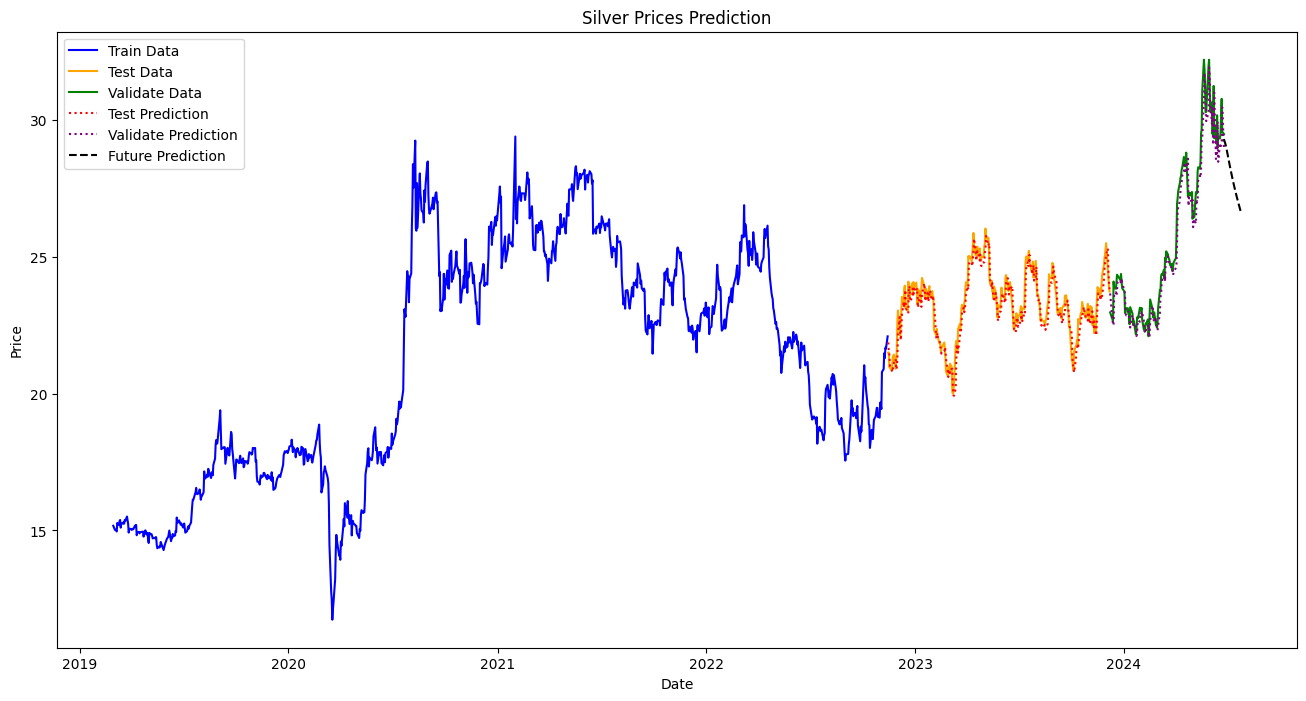

In [29]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [30]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.3273441300410012
MAPE:  1.4043644785379628
RMSE:  0.42730407019779015

** Validate **
MAE:  0.4528520654748987
MAPE:  1.690604220764709
RMSE:  0.6166513256775289


In [33]:
# Split dataset 6-3-1

In [34]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [35]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [36]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.21541, saving model to save_model_6_3_1.keras
15/15 - 3s - 184ms/step - loss: 0.2154
Epoch 2/80

Epoch 2: loss improved from 0.21541 to 0.07827, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0783
Epoch 3/80

Epoch 3: loss improved from 0.07827 to 0.05636, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0564
Epoch 4/80

Epoch 4: loss improved from 0.05636 to 0.05384, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0538
Epoch 5/80

Epoch 5: loss improved from 0.05384 to 0.04774, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0477
Epoch 6/80

Epoch 6: loss improved from 0.04774 to 0.04426, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0443
Epoch 7/80

Epoch 7: loss did not improve from 0.04426
15/15 - 1s - 43ms/step - loss: 0.0445
Epoch 8/80

Epoch 8: loss improved from 0.04426 to 0.04126, saving model to save_model_6_3_1.keras


In [38]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [39]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [40]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [41]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [42]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8526477813720703], [0.8479607701301575], [0.8445331454277039], [0.8412563800811768], [0.8373403549194336], [0.832789957523346], [0.8279080390930176], [0.8229917883872986], [0.8182225823402405], [0.8136698007583618], [0.8093360066413879], [0.8051996231079102], [0.8012383580207825], [0.7974371314048767], [0.793788731098175], [0.7902882695198059], [0.7869316935539246], [0.7837134599685669], [0.7806267738342285], [0.7776632308959961], [0.7748141884803772], [0.7720709443092346], [0.7694247961044312], [0.766867458820343], [0.7643909454345703], [0.7619880437850952], [0.759651780128479], [0.7573758363723755], [0.7551548480987549], [0.7529833912849426]]


In [43]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [44]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.1887016 ]
 [29.09275847]
 [29.02259498]
 [28.95551959]
 [28.87535854]
 [28.7822119 ]
 [28.68227902]
 [28.58164335]
 [28.4840177 ]
 [28.39082225]
 [28.30210947]
 [28.21743769]
 [28.13635059]
 [28.05853947]
 [27.98385671]
 [27.91220225]
 [27.84349313]
 [27.77761589]
 [27.71443141]
 [27.65376768]
 [27.59544778]
 [27.53929357]
 [27.48512691]
 [27.43277821]
 [27.38208397]
 [27.33289657]
 [27.28507325]
 [27.23848467]
 [27.19302104]
 [27.14857131]]


In [45]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

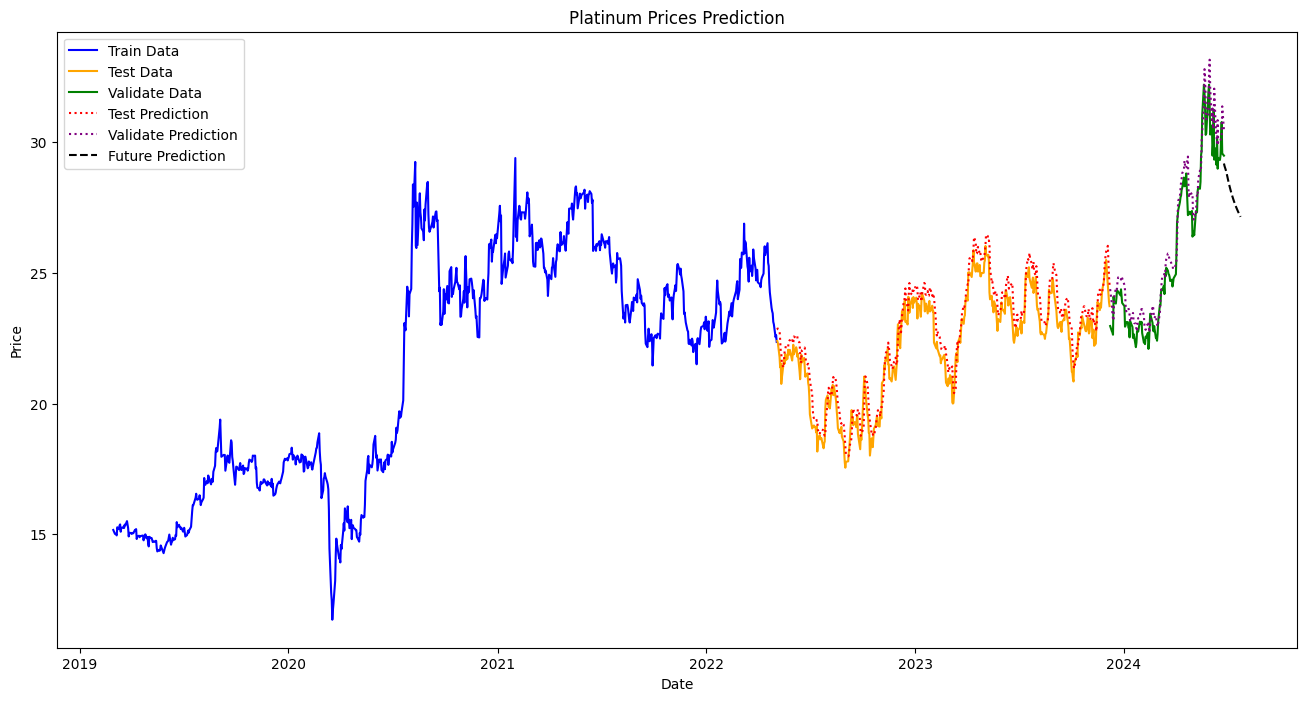

In [46]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [47]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.5491667483512896
MAPE:  2.4954348665840858
RMSE:  0.6516853308471103

** Validate **
MAE:  0.6502846894440826
MAPE:  2.5116725534372613
RMSE:  0.7838918514775002


In [48]:
# Split dataset 5-3-2 

In [49]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [50]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [51]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [52]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.23803, saving model to save_model_5_3_2.keras
12/12 - 3s - 224ms/step - loss: 0.2380
Epoch 2/80

Epoch 2: loss improved from 0.23803 to 0.09030, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0903
Epoch 3/80

Epoch 3: loss improved from 0.09030 to 0.05536, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0554
Epoch 4/80

Epoch 4: loss improved from 0.05536 to 0.04653, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0465
Epoch 5/80

Epoch 5: loss improved from 0.04653 to 0.04305, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0430
Epoch 6/80

Epoch 6: loss improved from 0.04305 to 0.04096, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0410
Epoch 7/80

Epoch 7: loss improved from 0.04096 to 0.04069, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0407
Epoch 8/80

Epoch 8: loss improved from 0.04069 to 0.03

In [53]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [54]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [55]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [56]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [57]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8568021059036255], [0.8559972643852234], [0.8578463792800903], [0.8594582080841064], [0.8597977757453918], [0.8590158224105835], [0.8576921820640564], [0.8563414812088013], [0.8552371859550476], [0.8544376492500305], [0.8538851737976074], [0.8534949421882629], [0.8532015681266785], [0.8529711365699768], [0.8527936935424805], [0.8526699542999268], [0.8526026606559753], [0.852591335773468], [0.8526313900947571], [0.8527168035507202], [0.8528404235839844], [0.852995753288269], [0.8531765937805176], [0.853378415107727], [0.8535963892936707], [0.8538269996643066], [0.8540664315223694], [0.8543115258216858], [0.8545593619346619], [0.8548071980476379]]


In [58]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [59]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.27374063]
 [29.25726552]
 [29.29511691]
 [29.32811104]
 [29.335062  ]
 [29.31905541]
 [29.29196049]
 [29.26431164]
 [29.24170671]
 [29.22534019]
 [29.21403102]
 [29.20604298]
 [29.20003761]
 [29.19532068]
 [29.19168842]
 [29.18915548]
 [29.18777797]
 [29.18754615]
 [29.18836607]
 [29.19011448]
 [29.19264498]
 [29.19582458]
 [29.19952639]
 [29.20365767]
 [29.2081196 ]
 [29.2128402 ]
 [29.21774137]
 [29.22275845]
 [29.22783165]
 [29.23290486]]


In [60]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

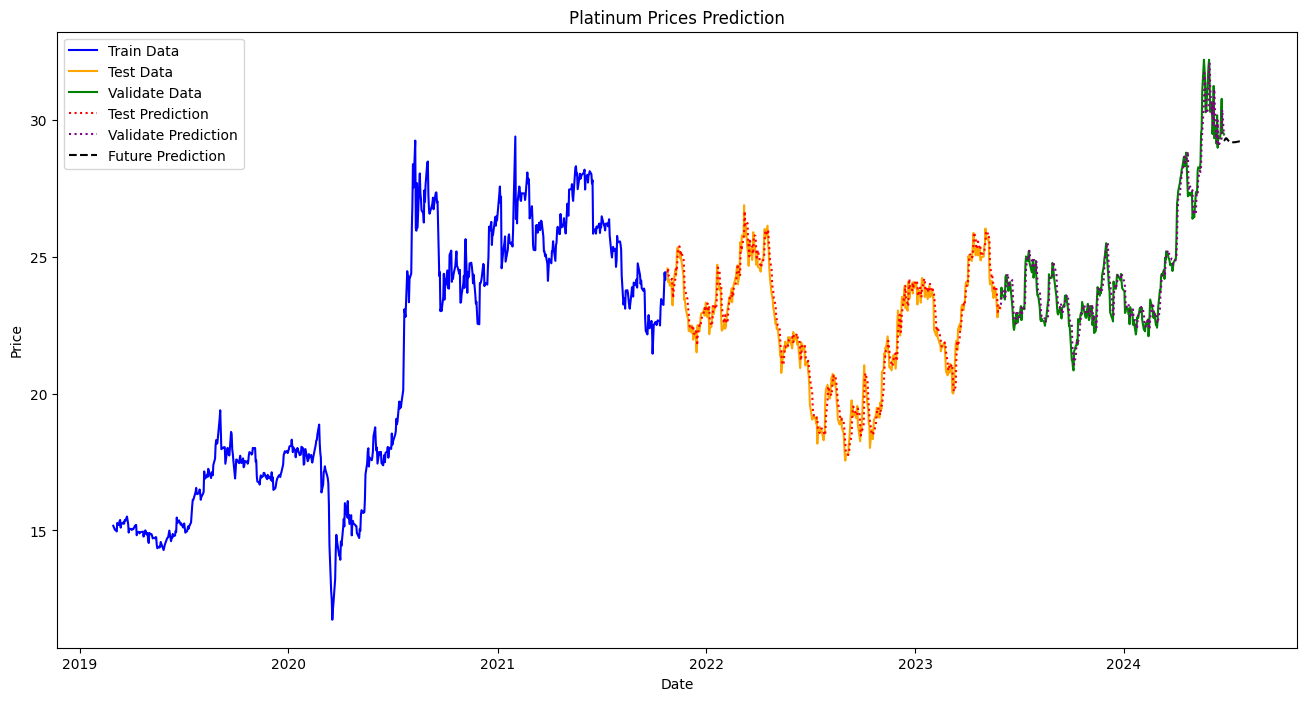

In [61]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [62]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.35834730057942304
MAPE:  1.621637101685833
RMSE:  0.46605416723243

** Validate **
MAE:  0.3716741391082307
MAPE:  1.492740933295406
RMSE:  0.49799927504131275


In [63]:
import pandas as pd

data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [0.3273, 0.5492, 0.3583],
    "Testing MAPE": [1.4044, 2.4954, 1.6216],
    "Testing RMSE": [0.4273, 0.6517, 0.4661],
    "Validation MAE": [0.4529, 0.6503, 0.3717],
    "Validation MAPE": [1.6906, 2.5117, 1.4927],
    "Validation RMSE": [0.6167, 0.7839, 0.4980],
}

df = pd.DataFrame(data)

print(df.to_string(index=False))


Model Ratio  Testing MAE  Testing MAPE  Testing RMSE  Validation MAE  Validation MAPE  Validation RMSE
 LSTM 7-2-1       0.3273        1.4044        0.4273          0.4529           1.6906           0.6167
 LSTM 6-3-1       0.5492        2.4954        0.6517          0.6503           2.5117           0.7839
 LSTM 5-3-2       0.3583        1.6216        0.4661          0.3717           1.4927           0.4980
